# Task         : Exploratory Data Analysis (Global Terrorism) 
# Category     : Data science & Business Analytics
# Performed by : Diksha P Gadataranavar
# Organization : The Sparks Foundation

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Reading the dataset of terrorism 

In [135]:
new_data=pd.read_csv(r"C:\Users\diksha\Documents\Newprojects\terrorist.csv",encoding="Latin1")

C:\Users\diksha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [136]:
new_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [137]:
new_data.shape

(181691, 135)

In [138]:
new_data.rename(columns={'eventid':'Event_ID','iyear':'Year','country':'No.of_attack','region':'No.of_region','imonth':'Month', 'iday':'Day', 'country_txt':'Country', 'region_txt':'Region', 'provstate':'State', 'city':'City',
                   'attacktype1_txt':'Attack_Type', 'targtype1_txt':'Target_Type', 'motive':'Motive', 'weaptype1_txt':'Weapon_Type',
                   'weapdetail':'Weapon_Details', 'nkill':'Kill', 'nwound':'Injured', 'summary':'Summary'}, inplace=True)


## Countries under High Terrorism attack

In [181]:
print("Countries under High Terrorism attack")
new_data['Country'].value_counts().head()

Countries under High Terrorism attack


Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64

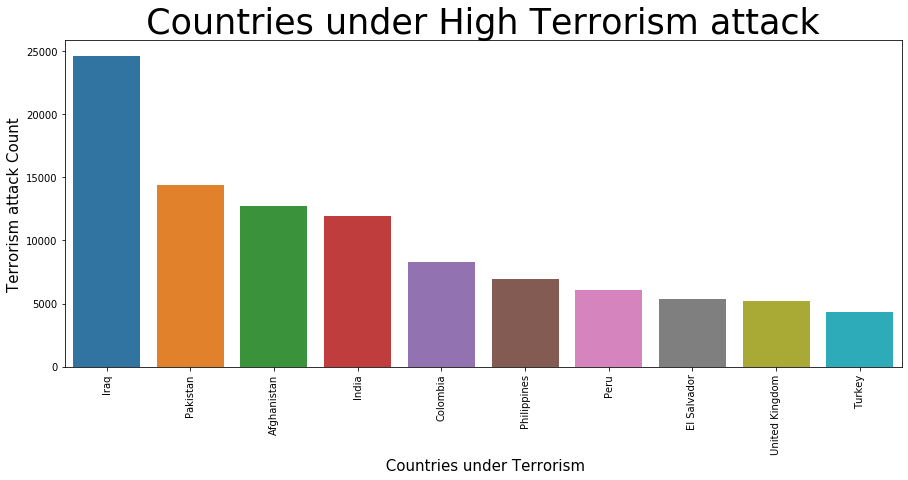

In [183]:
plt.figure(figsize=(15,6))
sns.barplot(new_data['Country'].value_counts()[:10].index, new_data['Country'].value_counts()[:10].values)
plt.xlabel(' Countries under Terrorism', fontsize=15)
plt.ylabel('Terrorism attack Count', fontsize=15)
plt.title(' Countries under High Terrorism attack ', fontsize=35)
plt.xticks(rotation=90)
plt.show()


In [125]:
print("Country with less terrorism ")
new_data['Country'].value_counts().tail()

Country with less terrorism 


St. Lucia            1
Andorra              1
Wallis and Futuna    1
North Korea          1
New Hebrides         1
Name: Country, dtype: int64

## Here we get that countries like Iraq ,Pakistan ,Afghanistan ,India ,Colombia have most terrorism attacks  

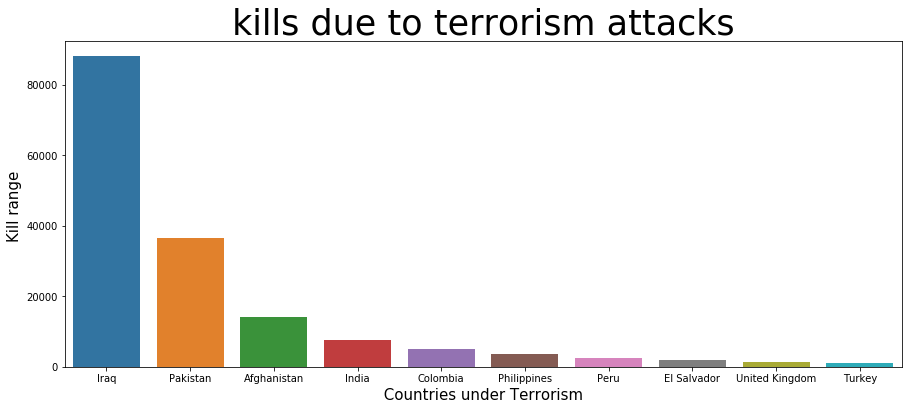

In [180]:
#line graph for country vs kill
plt.figure(figsize=(15,6))
sns.barplot(new_data['Country'].value_counts()[:10].index, new_data['Kill'].value_counts()[:10].values)
plt.xlabel(' Countries under Terrorism ', fontsize=15)
plt.ylabel('Kill range ', fontsize=15)
plt.title(' kills due to terrorism attacks ', fontsize=35)
plt.show()


In [148]:
print('Number of pepople Killed and Injured per year')
year1 = new_data.groupby(['Year'])['Kill', 'Injured'].sum()
year1.head(8)


Number of pepople Killed and Injured per year


C:\Users\diksha\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Kill,Injured
Year,,
1970,174.0,212.0
1971,173.0,82.0
1972,566.0,409.0
1973,370.0,495.0
1974,539.0,865.0
1975,617.0,617.0
1976,674.0,756.0
1977,456.0,518.0


In [149]:
print('Number of people Killed and Injured per year')
year2 = new_data.groupby(['Year'])['Kill', 'Injured'].sum()
year2.tail(10)

Number of people Killed and Injured per year


C:\Users\diksha\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Kill,Injured
Year,,
2008,9157.0,18998.0
2009,9273.0,19138.0
2010,7827.0,15947.0
2011,8246.0,14659.0
2012,15497.0,25445.0
2013,22273.0,37688.0
2014,44490.0,41128.0
2015,38853.0,44043.0
2016,34871.0,40001.0


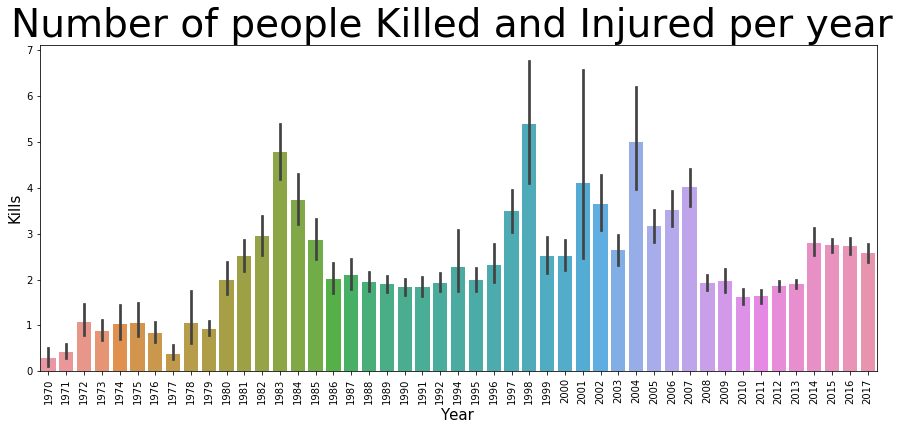

In [170]:
plt.figure(figsize=(15,6))
sns.barplot("Year","Kill",data=new_data)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Kills', fontsize=15)
plt.title('Number of people Killed and Injured per year ', fontsize=39)
plt.xticks(rotation=90)
plt.show()


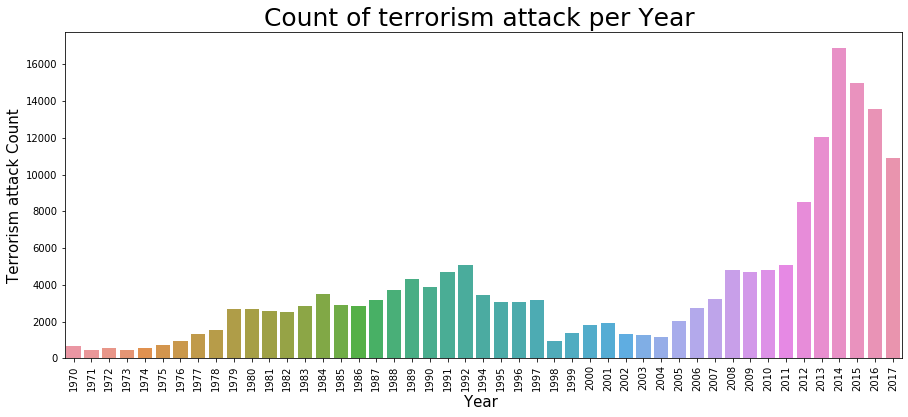

In [185]:
plt.figure(figsize=(15,6))
sns.countplot('Year', data=new_data)
plt.xlabel('Year ',fontsize=15)
plt.ylabel('Terrorism attack Count',fontsize=15)
plt.title('Count of terrorism attack per Year ', fontsize=25)
plt.xticks(rotation=90)
plt.show()

## Count of terrorism attacks per year has been seen increasing

In [67]:
attack_type = new_data.groupby(['Country'])['Attack_Type', 'Weapon_Type'].max()
attack_type.head(10)

C:\Users\diksha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Attack_Type,Weapon_Type
Country,,
Afghanistan,Unknown,Vehicle (not to include vehicle-borne explosiv...
Albania,Unknown,Unknown
Algeria,Unknown,Unknown
Andorra,Armed Assault,Firearms
Angola,Unknown,Unknown
Antigua and Barbuda,Facility/Infrastructure Attack,Incendiary
Argentina,Unknown,Unknown
Armenia,Hostage Taking (Kidnapping),Unknown
Australia,Unknown,Vehicle (not to include vehicle-borne explosiv...


In [153]:
print("Attacking Type used by Terrorist")
new_data['Attack_Type'].value_counts()

Attacking Type used by Terrorist


Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_Type, dtype: int64

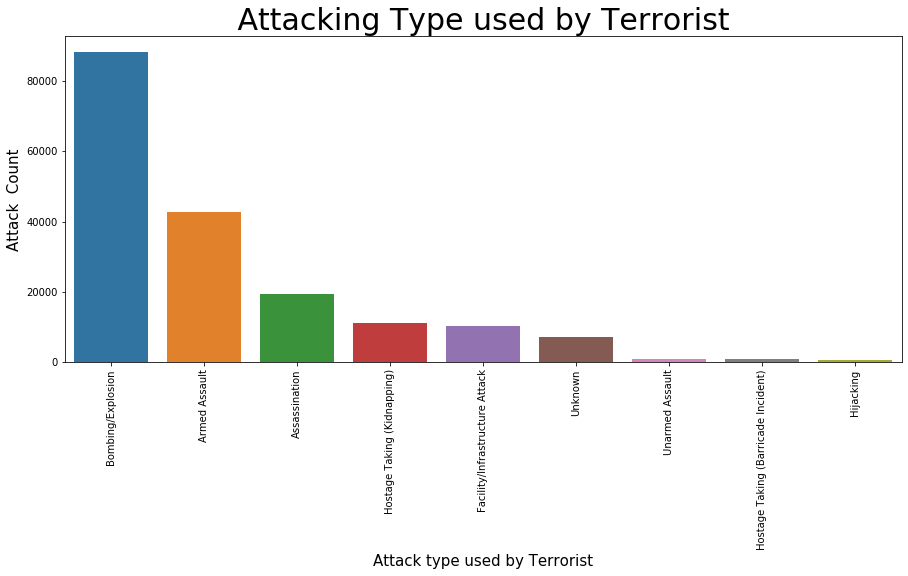

In [171]:
plt.figure(figsize=(15,6))
sns.barplot(new_data['Attack_Type'].value_counts()[:10].index, new_data['Attack_Type'].value_counts()[:10].values)
plt.xlabel('Attack type used by Terrorist',fontsize=15)
plt.ylabel('Attack  Count',fontsize=15)
plt.title(' Attacking Type used by Terrorist ', fontsize=30)
plt.xticks(rotation=90)
plt.show()

In [154]:
print("Weapon types used for attacking purpose")

new_data['Weapon_Type'].value_counts()

Weapon types used for attacking purpose


Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

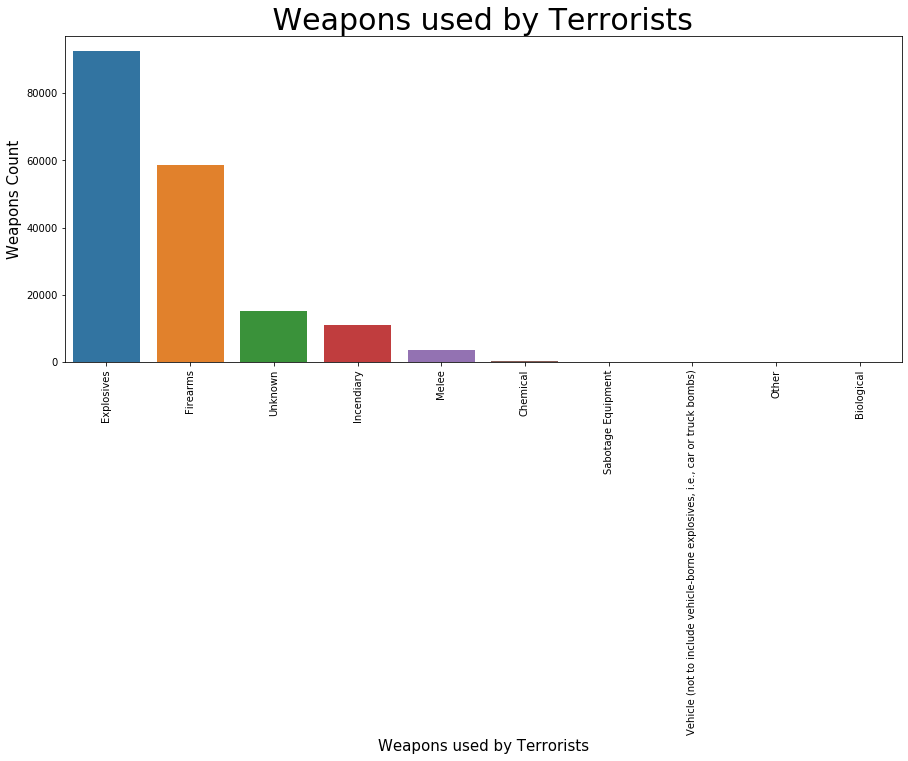

In [178]:
plt.figure(figsize=(15,6))
sns.barplot(new_data['Weapon_Type'].value_counts()[:10].index, new_data['Weapon_Type'].value_counts()[:10].values)
plt.xlabel('Weapons used by Terrorists', fontsize=15)
plt.ylabel('Weapons Count' ,fontsize=15)
plt.title(' Weapons used by Terrorists ', fontsize=30)
plt.xticks(rotation=90)
plt.show()

## Attack type is mostly Bombing/Explosive which creates high death rate and certain other illeffects

In [156]:
print("Region which is used for attacking purpose")

region = new_data['Region'].value_counts()
region.head()

Region which is used for attacking purpose


Middle East & North Africa    50474
South Asia                    44974
South America                 18978
Sub-Saharan Africa            17550
Western Europe                16639
Name: Region, dtype: int64

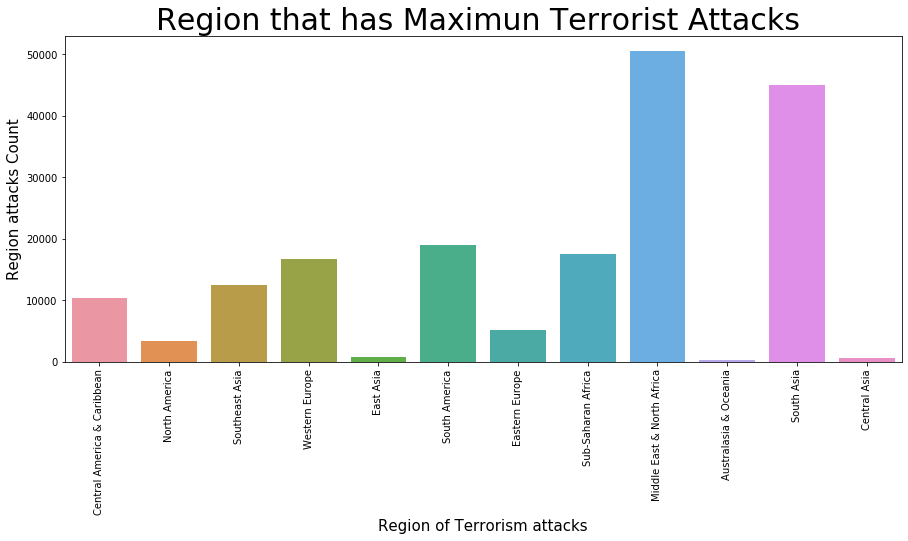

In [158]:

plt.figure(figsize=(15,6))
sns.countplot('Region', data=new_data)
plt.xlabel('Region of Terrorism attacks', fontsize=15)
plt.ylabel('Region attacks Count', fontsize=15)
plt.title('Region that has Maximun Terrorist Attacks ', fontsize=30)
plt.xticks(rotation=90)
plt.show()

## Middle East ,North Africa ,South Asia ,South America are the regions under maximum attacks   

In [88]:
#city which is hot zone
city = new_data['City'].value_counts()
city.head()

Unknown    9775
Baghdad    7589
Karachi    2652
Lima       2359
Mosul      2265
Name: City, dtype: int64

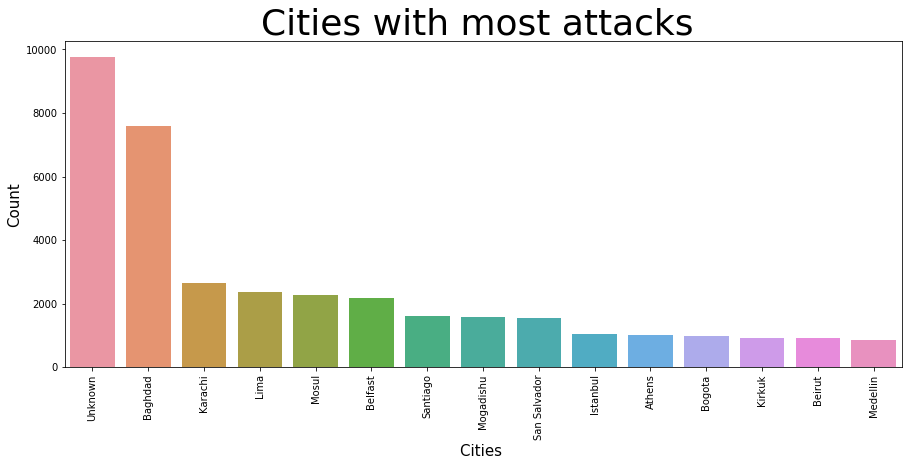

In [184]:

plt.figure(figsize=(15,6))
sns.barplot(new_data['City'].value_counts()[:15].index, new_data['City'].value_counts()[:15].values)
plt.xlabel('Cities ', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Cities with most attacks ', fontsize=36)
plt.xticks(rotation=90)
plt.show()

## Cities like baghdad,karachi,Lima have high number of attacks 

# Thankyou